In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('similarities.csv')

In [31]:
tag = []
sim = []
for i in range(0, len(data)):
    if float(data['similarity'][i][2:-2]) <.85:
        tag.append(data['Zooniverse tag'][i])
        sim.append(float(data['similarity'][i][2:-2]))

In [34]:
poor_tags = pd.DataFrame({'tag': tag, 'Similarity': sim})

In [35]:
poor_tags

,tag,Similarity
0,german,0.849992
1,livewhereiwant,0.849911
2,mos,0.849865
3,letsgohome,0.849829
4,investments,0.849812
...,...,...
2140,homesteaders,0.544233
2141,dotherealthing,0.538526
2142,suppies,0.537141
2143,commonsense,0.526695


In [37]:
from bert_serving.client import BertClient
bc = BertClient()

In [42]:
embeddings = []
for i in range(0, len(poor_tags)):
    embed = bc.encode([poor_tags['tag'][i]])
    embeddings.append(embed)

In [48]:
poor_tags['Embedding'] = [i[0] for i in embeddings]

In [60]:
final_poor_tags = {}

In [62]:
poor_tags

,tag,Similarity,Embedding
0,german,0.849992,"[-0.39046654, 0.3147922, -0.54012316, -0.60370..."
1,livewhereiwant,0.849911,"[0.18385711, -0.72551924, -0.08107586, -0.4664..."
2,mos,0.849865,"[-0.4812702, -0.13150856, -0.25761002, -0.1242..."
3,letsgohome,0.849829,"[-0.09876616, -0.80849266, 0.15181804, 0.20512..."
4,investments,0.849812,"[-0.5302333, -0.5484328, -0.3971614, -0.668338..."
...,...,...,...
2140,homesteaders,0.544233,"[-0.42156154, 0.07978978, -0.68453455, -0.3633..."
2141,dotherealthing,0.538526,"[-0.10711296, -0.2627995, -0.0941373, -0.55874..."
2142,suppies,0.537141,"[-0.70512664, -1.0680791, -0.37988022, -0.3548..."
2143,commonsense,0.526695,"[-0.08482907, 0.49594656, -0.07647783, -0.4272..."


In [63]:
final_poor_tags.update({'tag': [i for i in poor_tags['tag']]})

In [65]:
for i in range(0, 768):
    x = []
    for j in range(0, len(poor_tags)):
        x.append(poor_tags['Embedding'][j][i])
    final_poor_tags.update({'x' + str(i): x})

In [66]:
final_data = pd.DataFrame(final_poor_tags)

In [67]:
final_data

,tag,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x758,x759,x760,x761,x762,x763,x764,x765,x766,x767
0,german,-0.390467,0.314792,-0.540123,-0.603704,0.279355,0.331218,0.410887,0.459285,0.127248,...,0.086116,-0.498668,-0.094349,0.228451,-0.223769,0.142912,0.008934,-0.323369,-0.120598,0.080912
1,livewhereiwant,0.183857,-0.725519,-0.081076,-0.466417,-0.000441,-0.360860,0.199182,0.333551,-0.345849,...,0.380672,-0.381650,-0.159112,0.137110,0.250385,0.550869,-0.046778,-0.034692,-0.091950,-0.591506
2,mos,-0.481270,-0.131509,-0.257610,-0.124293,-0.147981,-0.072208,-0.266678,-0.125287,-0.081239,...,-0.018498,-0.108721,0.319614,0.017650,0.225055,0.035962,0.098043,-0.199158,-0.145766,0.242203
3,letsgohome,-0.098766,-0.808493,0.151818,0.205123,0.154454,-0.291414,0.157106,0.440201,-0.357876,...,-0.071864,-0.196173,-0.497349,0.003132,0.069088,0.178307,-0.089711,-0.084943,-0.159006,0.118370
4,investments,-0.530233,-0.548433,-0.397161,-0.668339,0.207233,0.292653,-0.286994,0.294828,-0.263793,...,0.020400,-0.447196,0.507118,0.062080,0.386563,-0.302746,0.516828,-0.289291,-0.262974,0.281655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,homesteaders,-0.421562,0.079790,-0.684535,-0.363310,0.615509,-0.116309,0.156449,0.950381,0.104068,...,-0.130172,-0.622284,-0.538530,-0.468171,0.210456,0.101745,0.330813,-0.092021,-0.343951,-0.664325
2141,dotherealthing,-0.107113,-0.262800,-0.094137,-0.558745,-0.006930,-0.430732,0.155962,0.106909,0.105807,...,-0.085539,-0.140841,-0.010322,0.278822,-0.173452,-0.310748,0.196105,-0.039901,0.181493,0.257656
2142,suppies,-0.705127,-1.068079,-0.379880,-0.354812,0.054461,0.444508,-0.193969,0.163297,0.436748,...,0.054818,-0.346162,0.237817,0.022030,-0.013611,-0.092701,0.413491,0.075349,-0.549815,0.385569
2143,commonsense,-0.084829,0.495947,-0.076478,-0.427254,0.610574,-0.544298,-0.186897,0.198569,-0.592407,...,0.203486,-0.440602,-0.072106,0.048633,0.590061,-0.302517,-0.300866,0.284751,-0.282085,0.502202


In [68]:
from sklearn.cluster import KMeans

In [76]:
kmeans = KMeans(n_clusters=20).fit(final_data.iloc[:, 1:])

In [86]:
[i for i in kmeans.labels_]

[15,
 17,
 19,
 17,
 1,
 17,
 5,
 3,
 5,
 5,
 0,
 19,
 7,
 7,
 12,
 1,
 17,
 16,
 5,
 17,
 4,
 15,
 1,
 3,
 3,
 17,
 17,
 1,
 16,
 15,
 14,
 17,
 17,
 17,
 17,
 15,
 1,
 17,
 16,
 19,
 17,
 5,
 1,
 1,
 13,
 5,
 17,
 17,
 1,
 4,
 0,
 16,
 17,
 1,
 1,
 17,
 13,
 3,
 17,
 17,
 17,
 17,
 3,
 17,
 5,
 16,
 16,
 4,
 17,
 8,
 17,
 16,
 16,
 5,
 17,
 16,
 1,
 4,
 4,
 5,
 17,
 0,
 16,
 1,
 5,
 1,
 17,
 1,
 12,
 1,
 1,
 15,
 1,
 17,
 19,
 19,
 17,
 10,
 1,
 14,
 4,
 15,
 1,
 12,
 16,
 4,
 16,
 14,
 17,
 5,
 10,
 8,
 2,
 4,
 5,
 17,
 19,
 5,
 15,
 4,
 10,
 17,
 16,
 17,
 19,
 16,
 17,
 17,
 15,
 17,
 1,
 14,
 17,
 5,
 4,
 17,
 16,
 17,
 16,
 12,
 1,
 17,
 13,
 13,
 5,
 8,
 16,
 17,
 5,
 5,
 5,
 15,
 5,
 4,
 17,
 16,
 16,
 12,
 17,
 17,
 15,
 17,
 1,
 3,
 16,
 1,
 17,
 1,
 17,
 5,
 14,
 8,
 16,
 13,
 2,
 5,
 1,
 10,
 2,
 16,
 4,
 8,
 0,
 12,
 17,
 17,
 16,
 4,
 14,
 1,
 13,
 1,
 16,
 4,
 17,
 9,
 17,
 16,
 12,
 1,
 5,
 5,
 14,
 12,
 16,
 1,
 7,
 16,
 17,
 17,
 16,
 5,
 13,
 16,
 5,
 14,
 1,
 17,
 

In [87]:
Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(final_data.iloc[:, 1:])
    Sum_of_squared_distances.append(km.inertia_)

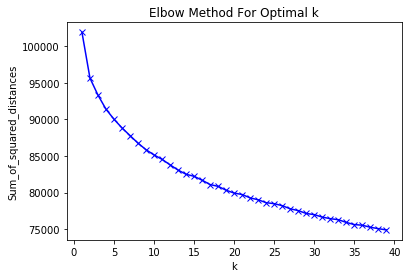

In [90]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()